In [1]:
import cv2
import os
import numpy as np

def start(home_dir, matrix_number):
    os.chdir(home_dir)
    paths = os.listdir(home_dir)
    paths = sorted(paths)
    v_counter = 0
    h_counter = 0
    temp = []
    img = []
    matrix = []
    xzoom = 260
    yzoom = 200
    for simulation in paths:
        if simulation.endswith('.png'):
            tags = simulation.split('_')
            temp = cv2.imread(simulation)
            if h_counter == 0:
                img = temp
            else:
                img = cv2.hconcat([img, temp])
            h_counter +=1
            if h_counter > 7:
                h_counter = 0
                if v_counter > 0:
                    matrix = cv2.vconcat([matrix, img])
                else:
                    matrix = img
                v_counter+=1
        os.chdir(home_dir)
    # cv2.imshow('image', matrix)
    # cv2.waitKey(0)
    cv2.imwrite(f'../replicate{matrix_number}_matrix.png', matrix)

def lil_rename(home_dir, target, numzeros):
    os.chdir(home_dir)
    paths = os.listdir(home_dir)
    for simulation_file in paths:
        if simulation_file.endswith('.png'):
            simulation = simulation_file.split('_')
            print(simulation[target])
            if int(simulation[target]) < 100:
                new_name = f'{simulation[0:target]}_{simulation[target].zfill(numzeros)}_{simulation[target:-1]}'
                # if len(simulation) > 3:
                #     new_name = f'{simulation[0]}_{simulation[1].zfill(3)}_{simulation[2]}_{simulation[3]}'
                # else:
                #     new_name = f'{simulation[0]}_{simulation[1].zfill(3)}_{simulation[2]}'
                os.rename(simulation_file, new_name)


def split_subfolders(home_dir, matrix_num):
    os.chdir(home_dir)
    paths = os.listdir(home_dir)
    paths = sorted(paths)
    for simulation in paths:
        if simulation.endswith('.png'):
            tags = simulation.split('_')
            if int(tags[1]) % 6 == matrix_num:
                new_name = f'{matrix_num}/{simulation}'
                os.rename(simulation,new_name)

def make_matrix_2(home_dir, input_file, matrix_name, numrows):
    os.chdir(home_dir)
    paths = os.listdir(home_dir)
    paths = sorted(paths)
    h_counter = 0
    v_counter = 0
    img = []
    matrix = []
    with open(input_file, 'r') as contents:
        for line in contents:
            image_name = line[:-1]
            print(image_name)
            temp = cv2.imread(image_name)
            if h_counter == 0:
                img = temp
            else:
                img = cv2.hconcat([img, temp])
            h_counter +=1
            if h_counter > numrows-1:
                h_counter = 0
                if v_counter > 0:
                    matrix = cv2.vconcat([matrix, img])
                else:
                    matrix = img
                v_counter+=1
            os.chdir(home_dir)
    contents.close()
    cv2.imwrite(f'{matrix_name}_matrix.png', matrix)

In [ ]:
directory = '/Users/andrew/PycharmProjects/pace_outputs/0913_dox+aba+_final/720_cropped_images/replicate1'
start(directory, 1)
directory = '/Users/andrew/PycharmProjects/pace_outputs/0913_dox+aba+_final/720_cropped_images/replicate2'
start(directory, 2)
directory = '/Users/andrew/PycharmProjects/pace_outputs/0913_dox+aba+_final/720_cropped_images/replicate3'
start(directory, 3)
# for i in range(6):
#     start(directory, i)

In [ ]:
directory = '//Users/andrew/PycharmProjects/CHO_adhesion_model/ry_matrix1/'
lil_rename(directory, 2, 2)

In [6]:
directory = '/Users/andrew/PycharmProjects/CHO_adhesion_model/ryvsrryy_final/'
input_filename = 'output.txt'
matrix_name = 'ryvsrryy'
numrows = 11
make_matrix_2(directory, input_filename, matrix_name, numrows)

urr10_uyy10_ury1_dox0.5_aba0.4_values_45_image.png
urr10_uyy10_ury5_dox0.5_aba0.4_values_45_image.png
urr10_uyy10_ury10_dox0.5_aba0.4_values_45_image.png
urr10_uyy10_ury15_dox0.5_aba0.4_values_45_image.png
urr10_uyy10_ury20_dox0.5_aba0.4_values_45_image.png
urr10_uyy10_ury25_dox0.5_aba0.4_values_45_image.png
urr10_uyy10_ury30_dox0.5_aba0.4_values_45_image.png
urr10_uyy10_ury35_dox0.5_aba0.4_values_45_image.png
urr10_uyy10_ury40_dox0.5_aba0.4_values_45_image.png
urr10_uyy10_ury45_dox0.5_aba0.4_values_45_image.png
urr10_uyy10_ury50_dox0.5_aba0.4_values_45_image.png
urr20_uyy20_ury1_dox0.5_aba0.4_values_45_image.png
urr20_uyy20_ury5_dox0.5_aba0.4_values_45_image.png
urr20_uyy20_ury10_dox0.5_aba0.4_values_45_image.png
urr20_uyy20_ury15_dox0.5_aba0.4_values_45_image.png
urr20_uyy20_ury20_dox0.5_aba0.4_values_45_image.png
urr20_uyy20_ury25_dox0.5_aba0.4_values_45_image.png
urr20_uyy20_ury30_dox0.5_aba0.4_values_45_image.png
urr20_uyy20_ury35_dox0.5_aba0.4_values_45_image.png
urr20_uyy20_ury4

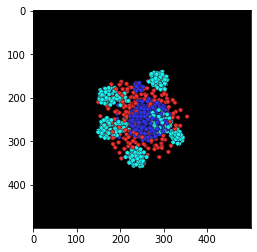

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

os.chdir('/Users/andrew/PycharmProjects/ST_CHO_adhesion_model/videos')
video = cv2.VideoCapture('100yy_40rr.mp4')

while(video.isOpened()):
    ret, frame = video.read()
    if ret:
        plt.imshow(frame)
        
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else:
        break
video.release()
cv2.destroyAllWindows()

In [3]:
directory = '/Users/andrew/PycharmProjects/cell_polarity_organoid/outputs/repulsion/temp'
input_filename = 'output.txt'
matrix_name = 'repulsion'
numrows = 9
make_matrix_2(directory, input_filename, matrix_name, numrows)

ugc30_ucc5_ugg40_gel100_cell900_image_240.png
ugc30_ucc5_ugg40_gel200_cell800_image_240.png
ugc30_ucc5_ugg40_gel300_cell700_image_240.png
ugc30_ucc5_ugg40_gel400_cell600_image_240.png
ugc30_ucc5_ugg40_gel500_cell500_image_240.png
ugc30_ucc5_ugg40_gel600_cell400_image_240.png
ugc30_ucc5_ugg40_gel700_cell300_image_240.png
ugc30_ucc5_ugg40_gel800_cell200_image_240.png
ugc30_ucc5_ugg40_gel900_cell100_image_240.png
